In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv('healthy_lifestyle_city_2021.csv')
data

,City,Rank,Sunshine hours(City),Cost of a bottle of water(City),Obesity levels(Country),Life expectancy(years) (Country),Pollution(Index score) (City),Annual avg. hours worked,Happiness levels(Country),Outdoor activities(City),Number of take out places(City),Cost of a monthly gym membership(City)
0,Amsterdam,1,1858,£1.92,20.40%,81.2,30.93,1434,7.44,422,1048,£34.90
1,Sydney,2,2636,£1.48,29.00%,82.1,26.86,1712,7.22,406,1103,£41.66
2,Vienna,3,1884,£1.94,20.10%,81.0,17.33,1501,7.29,132,1008,£25.74
3,Stockholm,4,1821,£1.72,20.60%,81.8,19.63,1452,7.35,129,598,£37.31
4,Copenhagen,5,1630,£2.19,19.70%,79.8,21.24,1380,7.64,154,523,£32.53
5,Helsinki,6,1662,£1.60,22.20%,80.4,13.08,1540,7.80,113,309,£35.23
6,Fukuoka,7,2769,£0.78,4.30%,83.2,-,1644,5.87,35,539,£55.87
7,Berlin,8,1626,£1.55,22.30%,80.6,39.41,1386,7.07,254,1729,£26.11
8,Barcelona,9,2591,£1.19,23.80%,82.2,65.19,1686,6.40,585,2344,£37.80
9,Vancouver,10,1938,£1.08,29.40%,81.7,24.26,1670,7.23,218,788,£31.04


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44 entries, 0 to 43
Data columns (total 12 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   City                                    44 non-null     object 
 1   Rank                                    44 non-null     int64  
 2   Sunshine hours(City)                    44 non-null     object 
 3   Cost of a bottle of water(City)         44 non-null     object 
 4   Obesity levels(Country)                 44 non-null     object 
 5   Life expectancy(years) (Country)        44 non-null     float64
 6   Pollution(Index score) (City)           44 non-null     object 
 7   Annual avg. hours worked                44 non-null     object 
 8   Happiness levels(Country)               44 non-null     float64
 9   Outdoor activities(City)                44 non-null     int64  
 10  Number of take out places(City)         44 non-null     int64  


The data describe the healthy lifestyle metrics of top 44 cities. It contains 12 columns representing:Rank, City, Sunshine hours(City), Cost of a bottle of water(City), Obesity levels(Country), Life expectancy(years) (Country, Pollution(Index score) (City), Annual avg. hours worked, Happiness levels(Country), Outdoor activities(City), Number of take out places(City), Cost of a monthly gym membership(City).
7 features are represented by categorical data and 5 features are represented by numerical data.

In [4]:
data.isnull().sum().sum()

0

There is no null values in the data. However, missing data were reported and marked by '-'. We need to find a way to replace them by numerical values. We also have £ and % signs that we have to remove from the data frame. Thus, these categorical columns will be numerical so we can process the data. Let's see were are exactly the caracteres that we need to remove or replcae.

In [5]:
change_cols=['Cost of a bottle of water(City)','Cost of a bottle of water(City)','Obesity levels(Country)','Annual avg. hours worked','Happiness levels(Country)', 'Cost of a monthly gym membership(City)']



In [6]:
for col in change_cols:
    print(data[data[col].apply(pd.to_numeric, errors='coerce').isna()][col]) 
    print('\n')

0     £1.92
1     £1.48
2     £1.94
3     £1.72
4     £2.19
5     £1.60
6     £0.78
7     £1.55
8     £1.19
9     £1.08
10    £1.57
11    £0.26
12    £0.22
13    £0.57
14    £1.09
15    £1.30
16    £0.21
17    £0.59
18    £1.95
19    £2.62
20    £1.63
21    £0.15
22    £0.16
23    £0.57
24    £1.52
25    £0.15
26    £1.39
27    £1.40
28    £0.76
29    £1.20
30    £0.75
31    £0.29
32    £2.11
33    £1.60
34    £1.95
35    £0.44
36    £3.20
37    £1.16
38    £0.59
39    £1.15
40    £1.45
41    £1.32
42    £0.41
43    £0.45
Name: Cost of a bottle of water(City), dtype: object


0     £1.92
1     £1.48
2     £1.94
3     £1.72
4     £2.19
5     £1.60
6     £0.78
7     £1.55
8     £1.19
9     £1.08
10    £1.57
11    £0.26
12    £0.22
13    £0.57
14    £1.09
15    £1.30
16    £0.21
17    £0.59
18    £1.95
19    £2.62
20    £1.63
21    £0.15
22    £0.16
23    £0.57
24    £1.52
25    £0.15
26    £1.39
27    £1.40
28    £0.76
29    £1.20
30    £0.75
31    £0.29
32    £2.11
33    £1.60
34    £1.

In [7]:
cols_numeric1 = ['Cost of a monthly gym membership(City)', 'Obesity levels(Country)', 'Cost of a bottle of water(City)']
#In these columns, £ and % will be removed and then move type to folat.

cols_numeric2 = ['Sunshine hours(City)', 'Pollution(Index score) (City)', 'Annual avg. hours worked']
# we just need to change them to numeric and "-" will move to NaN by deafult

In [8]:
# define function to replace "£" and "%"
def my_replace(data_frame, col_name):
    for x in data_frame[col_name]:
        if '£' in x:
            val = float(x.replace('£', ''))
        elif '%' in x:
            val = float(x.replace('%', ''))/100
        else:
            val = x
        yield val

In [9]:
for col in cols_numeric1:
    data[col] = list(my_replace(data, col))
    
for col in cols_numeric2:
    data[col] = data[col].apply(pd.to_numeric, errors='coerce')

We converted the categorical data to numerical data in order to find the missing data.

In [10]:
data

,City,Rank,Sunshine hours(City),Cost of a bottle of water(City),Obesity levels(Country),Life expectancy(years) (Country),Pollution(Index score) (City),Annual avg. hours worked,Happiness levels(Country),Outdoor activities(City),Number of take out places(City),Cost of a monthly gym membership(City)
0,Amsterdam,1,1858.0,1.92,0.204,81.2,30.93,1434.0,7.44,422,1048,34.90
1,Sydney,2,2636.0,1.48,0.290,82.1,26.86,1712.0,7.22,406,1103,41.66
2,Vienna,3,1884.0,1.94,0.201,81.0,17.33,1501.0,7.29,132,1008,25.74
3,Stockholm,4,1821.0,1.72,0.206,81.8,19.63,1452.0,7.35,129,598,37.31
4,Copenhagen,5,1630.0,2.19,0.197,79.8,21.24,1380.0,7.64,154,523,32.53
5,Helsinki,6,1662.0,1.60,0.222,80.4,13.08,1540.0,7.80,113,309,35.23
6,Fukuoka,7,2769.0,0.78,0.043,83.2,NaN,1644.0,5.87,35,539,55.87
7,Berlin,8,1626.0,1.55,0.223,80.6,39.41,1386.0,7.07,254,1729,26.11
8,Barcelona,9,2591.0,1.19,0.238,82.2,65.19,1686.0,6.40,585,2344,37.80
9,Vancouver,10,1938.0,1.08,0.294,81.7,24.26,1670.0,7.23,218,788,31.04


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44 entries, 0 to 43
Data columns (total 12 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   City                                    44 non-null     object 
 1   Rank                                    44 non-null     int64  
 2   Sunshine hours(City)                    43 non-null     float64
 3   Cost of a bottle of water(City)         44 non-null     float64
 4   Obesity levels(Country)                 44 non-null     float64
 5   Life expectancy(years) (Country)        44 non-null     float64
 6   Pollution(Index score) (City)           43 non-null     float64
 7   Annual avg. hours worked                33 non-null     float64
 8   Happiness levels(Country)               44 non-null     float64
 9   Outdoor activities(City)                44 non-null     int64  
 10  Number of take out places(City)         44 non-null     int64  


Changing categorical columns to float was done. Let's see if we have missing values.

In [12]:
data.isnull().sum()

City                                       0
Rank                                       0
Sunshine hours(City)                       1
Cost of a bottle of water(City)            0
Obesity levels(Country)                    0
Life expectancy(years) (Country)           0
Pollution(Index score) (City)              1
Annual avg. hours worked                  11
Happiness levels(Country)                  0
Outdoor activities(City)                   0
Number of take out places(City)            0
Cost of a monthly gym membership(City)     0
dtype: int64

13 missing values were reported: one in Sunshine hours(City), one in Pollution(Index score) (City)  and 11 in Annual avg. hours worked. Let's try to fill them with relevant values.

In [13]:
data[data.loc[: , 'Sunshine hours(City)'].isnull()]

,City,Rank,Sunshine hours(City),Cost of a bottle of water(City),Obesity levels(Country),Life expectancy(years) (Country),Pollution(Index score) (City),Annual avg. hours worked,Happiness levels(Country),Outdoor activities(City),Number of take out places(City),Cost of a monthly gym membership(City)
19,Geneva,20,NaN,2.62,0.195,82.6,27.25,1557.0,7.56,44,444,70.0


We located the missing value in 'Sunshine hours(City)' which was in the row representing Geneva. Let's google it. Total annual sunchine in Geneva is 1828 according to https://www.currentresults.com/Weather/Switzerland/annual-sunshine.php.

In [14]:
data.iloc[19, 2] = 1828

In [15]:
data['Sunshine hours(City)'].isnull().sum()

0

In [16]:
data[data.loc[: , 'Pollution(Index score) (City)'].isnull()]

,City,Rank,Sunshine hours(City),Cost of a bottle of water(City),Obesity levels(Country),Life expectancy(years) (Country),Pollution(Index score) (City),Annual avg. hours worked,Happiness levels(Country),Outdoor activities(City),Number of take out places(City),Cost of a monthly gym membership(City)
6,Fukuoka,7,2769.0,0.78,0.043,83.2,NaN,1644.0,5.87,35,539,55.87


We located the missing value in 'Pollution(Index score) (City)' which was in the row representing Fukuoka. Let's google it. The Pollution index in Fukuoka is 43 according to https://air.plumelabs.com/air-quality-in-Fukuoka-7OTZ.

In [17]:
data.iloc[6, 6] = 43

In [18]:
data['Pollution(Index score) (City)'].isnull().sum()

0

In [19]:
data[data.loc[: , 'Annual avg. hours worked'].isnull()]

,City,Rank,Sunshine hours(City),Cost of a bottle of water(City),Obesity levels(Country),Life expectancy(years) (Country),Pollution(Index score) (City),Annual avg. hours worked,Happiness levels(Country),Outdoor activities(City),Number of take out places(City),Cost of a monthly gym membership(City)
11,Beijing,12,2671.0,0.26,0.062,75.4,85.43,NaN,5.12,223,261,38.62
12,Bangkok,13,2624.0,0.22,0.100,74.1,76.64,NaN,5.99,377,1796,50.03
13,Buenos Aires,14,2525.0,0.57,0.283,75.9,52.64,NaN,5.97,246,1435,22.45
16,Jakarta,17,2983.0,0.21,0.069,68.5,84.39,NaN,5.28,114,833,29.94
22,Cairo,23,3542.0,0.16,0.320,70.7,91.74,NaN,4.15,323,250,23.25
23,Taipei,24,1405.0,0.57,0.062,75.4,49.32,NaN,5.12,134,717,34.76
25,Mumbai,26,2584.0,0.15,0.039,67.3,82.84,NaN,3.57,187,1183,19.54
30,Hong Kong,31,1836.0,0.75,0.062,75.4,67.46,NaN,5.51,277,1257,57.95
31,Shanghai,32,1776.0,0.29,0.062,75.4,77.40,NaN,5.12,108,346,44.68
35,Sao Paulo,36,2003.0,0.44,0.221,73.9,79.78,NaN,6.37,158,3355,16.07


We located the missing values in 'Annual avg. hours worked' which were in the rows representing Beijing, Bangkok, Buenos Aires, Jakarta, Cairo, Taipei, Mumbai, Hong Kong, Shanghai, Sao Paulo	and Johannesburg. Let's google it. The data is available in https://clockify.me/working-hours.

In [20]:
missing_hours = {'Beijing': 2096,'Bangkok': 2209,'Buenos Aires': 1792,'Jakarta': 2282,'Cairo': 1888,'Taipei': 2163,'Mumbai': 2691,'Hong Kong': 2171,'Shanghai': 1987,'Sao Paulo': 1890,'Johannesburg': 2209 }


In [21]:
data['Annual avg. hours worked'] = [missing_hours[x] if x in missing_hours.keys() else y for x, y in zip(data['City'], data['Annual avg. hours worked'])]

In [22]:
data.isnull().sum().sum()

0

Now, let's do some EDA.

In [23]:
data.describe()

,Rank,Sunshine hours(City),Cost of a bottle of water(City),Obesity levels(Country),Life expectancy(years) (Country),Pollution(Index score) (City),Annual avg. hours worked,Happiness levels(Country),Outdoor activities(City),Number of take out places(City),Cost of a monthly gym membership(City)
count,44.000000,44.000000,44.000000,44.000000,44.00000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000
mean,22.500000,2236.363636,1.173409,0.219250,78.17500,50.937727,1786.000000,6.435000,213.977273,1443.113636,40.420000
std,12.845233,564.294418,0.718642,0.101957,5.30437,21.635232,278.098694,0.991202,127.190297,1388.803270,15.006457
min,1.000000,1405.000000,0.150000,0.039000,56.30000,13.080000,1380.000000,3.570000,23.000000,250.000000,16.070000
25%,11.750000,1809.750000,0.570000,0.195000,75.40000,36.067500,1576.500000,5.870000,125.250000,548.000000,31.310000
50%,22.500000,2066.000000,1.195000,0.223000,80.40000,50.980000,1775.500000,6.900000,189.500000,998.000000,37.330000
75%,33.250000,2626.500000,1.600000,0.290000,81.80000,66.350000,1914.750000,7.175000,288.250000,1674.250000,47.210000
max,44.000000,3542.000000,3.200000,0.362000,83.20000,91.740000,2691.000000,7.800000,585.000000,6417.000000,73.110000


The happiness level is ranged between 5.87 and 7.8 with a mean of 6.34. The life expectancy is ranged between 56.3 and 83 with a mean of 78.17. The obesity level is ranged from 0.03 to 0.3 with a mean of 0.22. 

In [24]:
data.head(3)

,City,Rank,Sunshine hours(City),Cost of a bottle of water(City),Obesity levels(Country),Life expectancy(years) (Country),Pollution(Index score) (City),Annual avg. hours worked,Happiness levels(Country),Outdoor activities(City),Number of take out places(City),Cost of a monthly gym membership(City)
0,Amsterdam,1,1858.0,1.92,0.204,81.2,30.93,1434.0,7.44,422,1048,34.90
1,Sydney,2,2636.0,1.48,0.290,82.1,26.86,1712.0,7.22,406,1103,41.66
2,Vienna,3,1884.0,1.94,0.201,81.0,17.33,1501.0,7.29,132,1008,25.74


Amsterdam, Sydney and Vienna are ranked as the most healthy cities.

In [25]:
data.tail(3)

,City,Rank,Sunshine hours(City),Cost of a bottle of water(City),Obesity levels(Country),Life expectancy(years) (Country),Pollution(Index score) (City),Annual avg. hours worked,Happiness levels(Country),Outdoor activities(City),Number of take out places(City),Cost of a monthly gym membership(City)
41,New York,42,2535.0,1.32,0.362,78.8,57.36,1779.0,6.94,359,3081,64.66
42,Moscow,43,1901.0,0.41,0.231,69.5,57.63,1965.0,5.54,322,3206,31.40
43,Mexico City,44,2555.0,0.45,0.289,76.4,82.78,2137.0,6.46,192,1313,41.99


New York, Moscow and mexico city are the less healthy cities.

Let's see the distribution of each parameter.

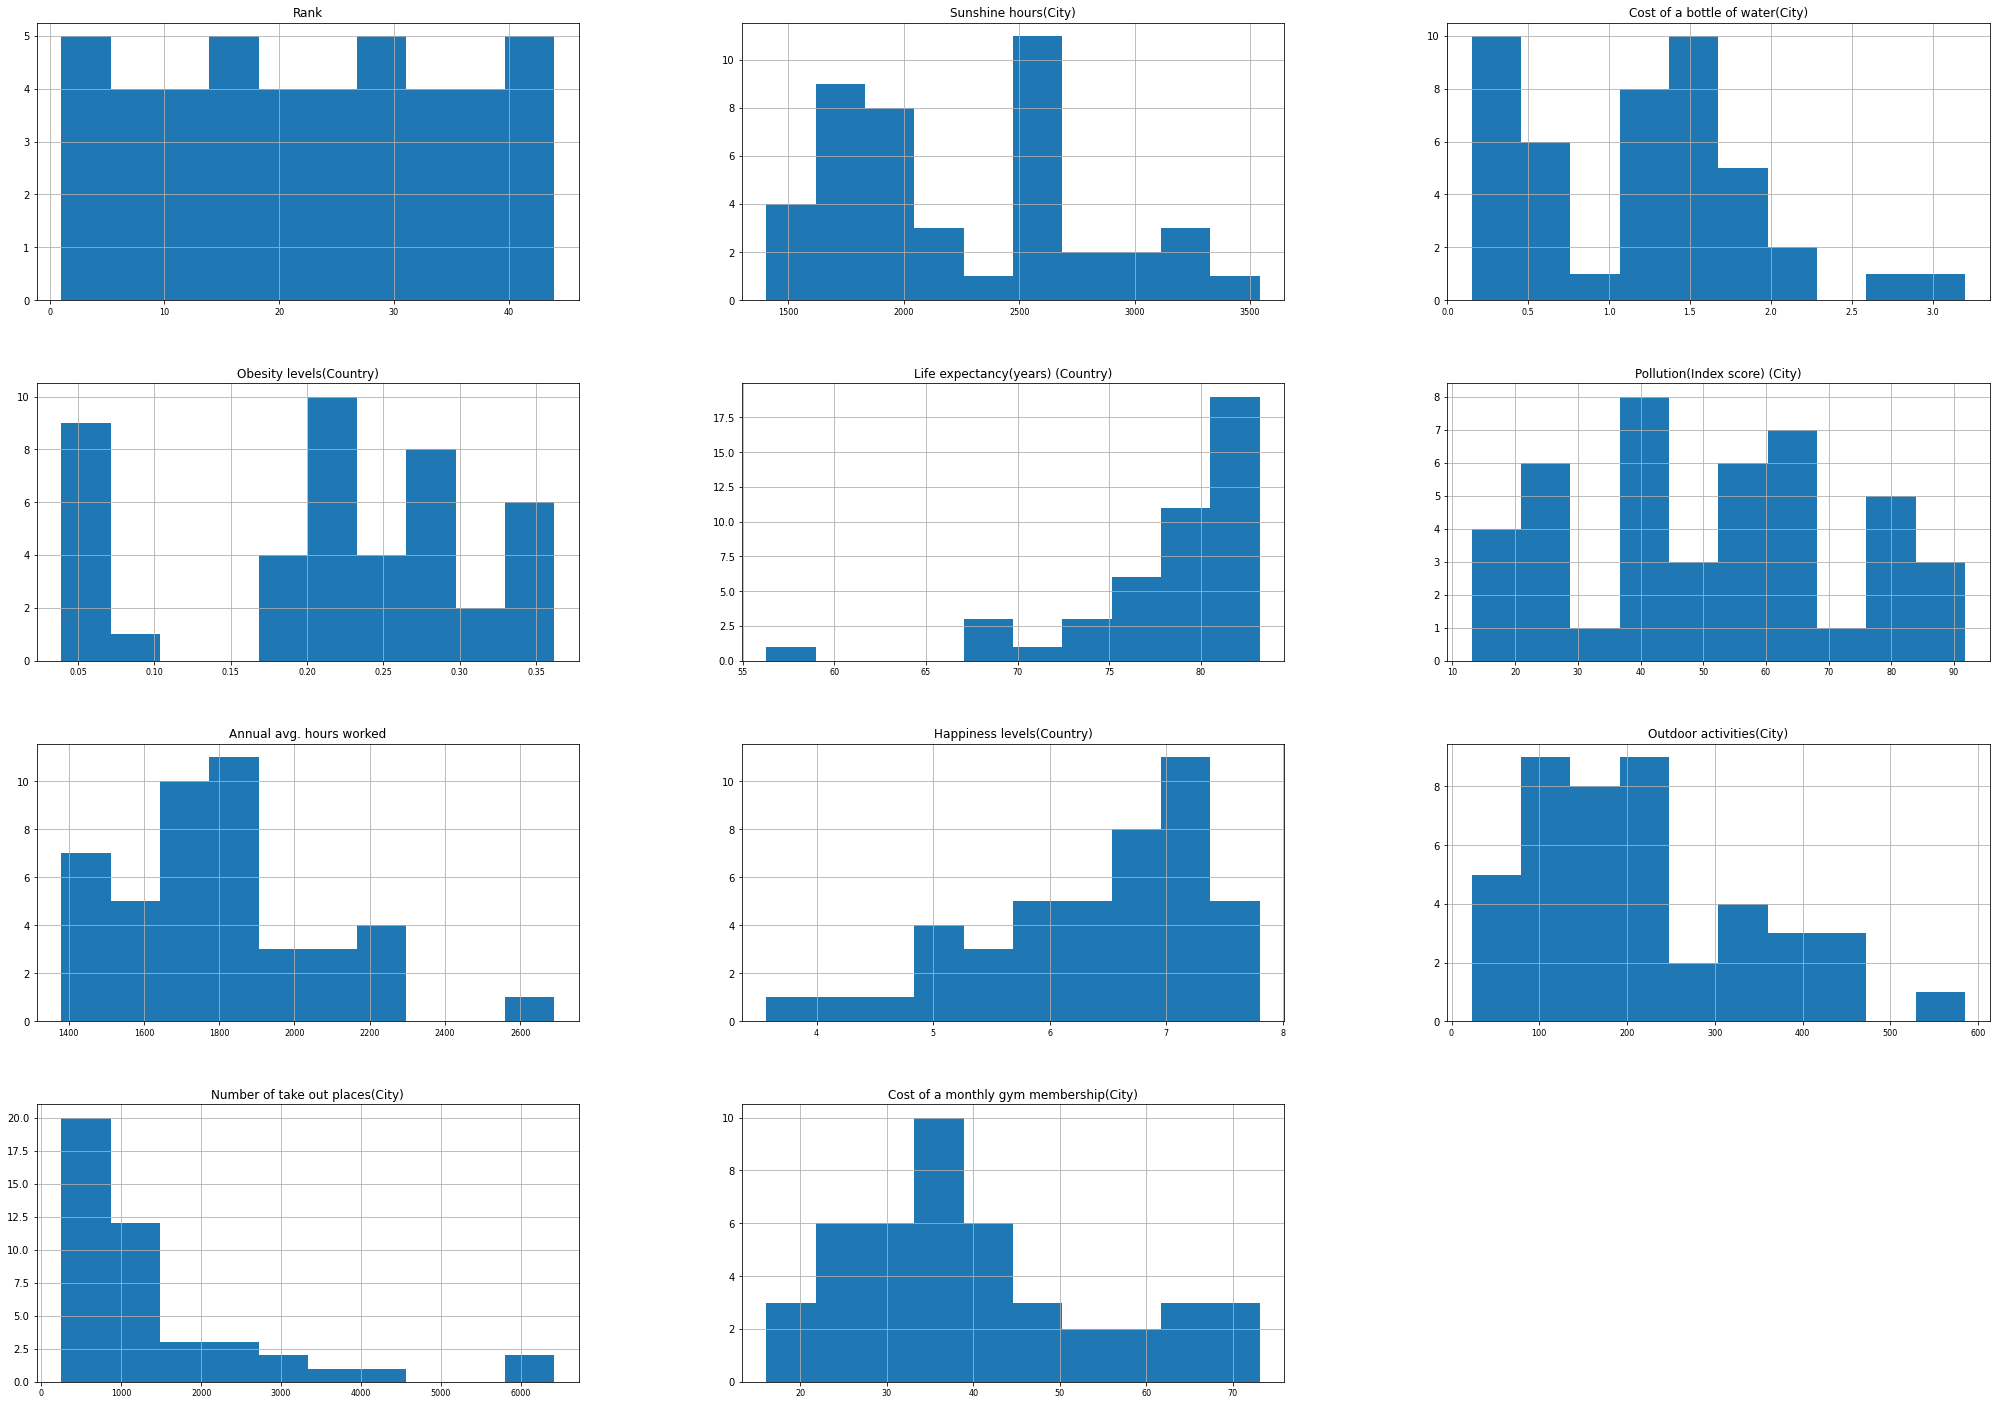

In [26]:
data.hist(figsize=(35,25), xrot=0, xlabelsize=(8))
plt.show()

As shown in figures, the distribution of the elements is not a normal distribution. It is mostly skewed to the left or to the right. Thus, we may need to do more work on the data.

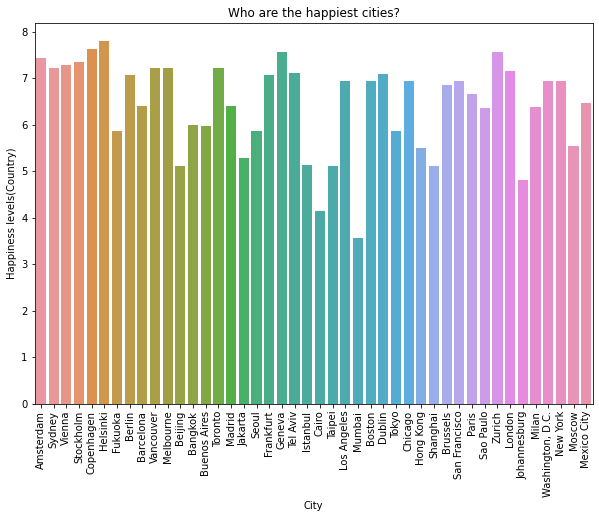

In [27]:
plt.figure(figsize = (10,7))
sns.barplot(data = data,x='City',y='Happiness levels(Country)')
plt.xticks(rotation=90)
plt.title("Who are the happiest cities?")
plt.show()

Amsterdam, Sydney, Vienna, Stockholm are the most healthy cities and the happiest. On the other hand, Sao Paolo is ranked 36 on the basis of healithy lifestyle but it is one the happiest cities. It seems like happiness and healthy life style don't have  identical distirbutions. 

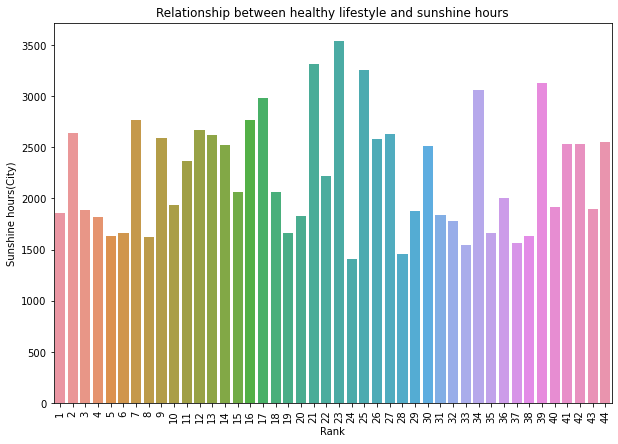

In [28]:
plt.figure(figsize = (10,7))
sns.barplot(data = data,x='Rank',y='Sunshine hours(City)')
plt.xticks(rotation=90)
plt.title("Relationship between healthy lifestyle and sunshine hours")
plt.show()

The figure shows that the sunshine hours does not affect the healthy life style of the city. In fact, Amsterdam has the most healthy lifestyle (Rank 1) and very low sunshine hours whereas Johannesburg who has high sunshine hours (3000) is ranked 39 on the basis of healthy lifestyle.  It seems like sunshine hours and healthy life style don't have identical distirbutions.     

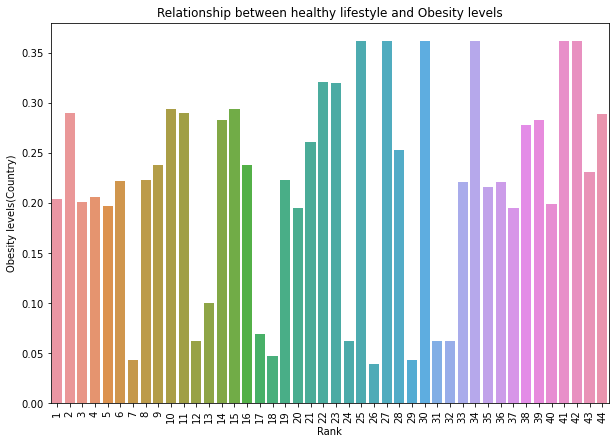

In [29]:
plt.figure(figsize = (10,7))
sns.barplot(data = data,x='Rank',y='Obesity levels(Country)')
plt.xticks(rotation=90)
plt.title("Relationship between healthy lifestyle and Obesity levels")
plt.show()

Well, it is obvious that cities with high obesity level ( from 0.20 to 0.35) are ranked from 33 to 44. However, the cities on the top of healthy lifestyle are not those with the lowest obesity levels. It seems like obesity level s and healthy life style don't have identical distirbutions.

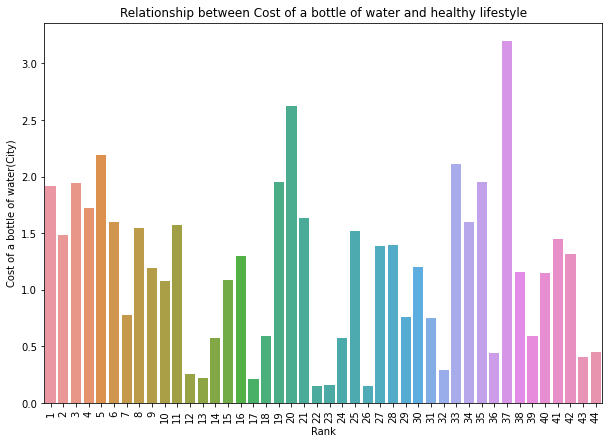

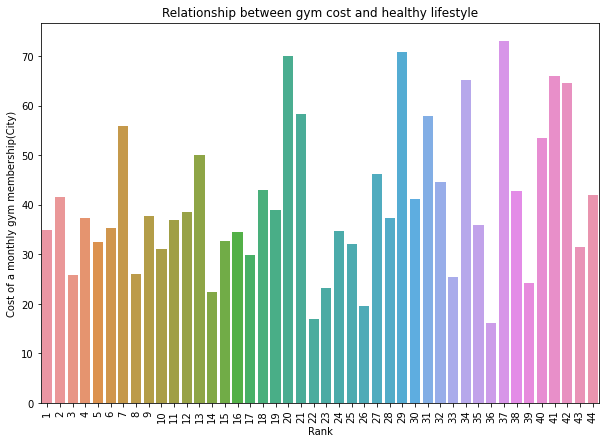

In [30]:
plt.figure(figsize = (10,7))
sns.barplot(data = data,x='Rank',y='Cost of a bottle of water(City)')
plt.xticks(rotation=90)
plt.title("Relationship between Cost of a bottle of water and healthy lifestyle")
plt.show()

plt.figure(figsize = (10,7))
sns.barplot(data = data,x='Rank',y='Cost of a monthly gym membership(City)')
plt.xticks(rotation=90)
plt.title("Relationship between gym cost and healthy lifestyle")
plt.show()

These figures show the accessibility of food and activities for citizines. They have relatively similar distributions. For example, in Zurich and Geneva both gym and food costs are expensive whereas in Instabul and Mumbai both gym and food are cheap. Vienna, Brussels, Copenhagen, Berlin have cheap food and exppensive activities cost. 

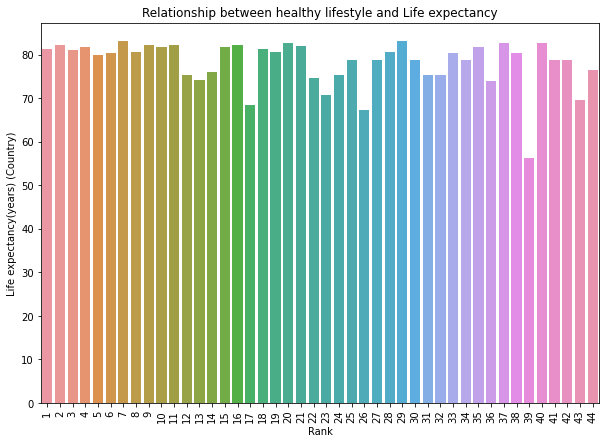

In [31]:
plt.figure(figsize = (10,7))
sns.barplot(data = data,x='Rank',y='Life expectancy(years) (Country)')
plt.xticks(rotation=90)
plt.title("Relationship between healthy lifestyle and Life expectancy")
plt.show()

As shown in figure, the life expectancy is ranged between 70 and 83 for most of the cities. Johannesburg is an outlier with life expectancy of 56.3. In most of cases, cities with the most health lifestyle have the highest life expectancy.

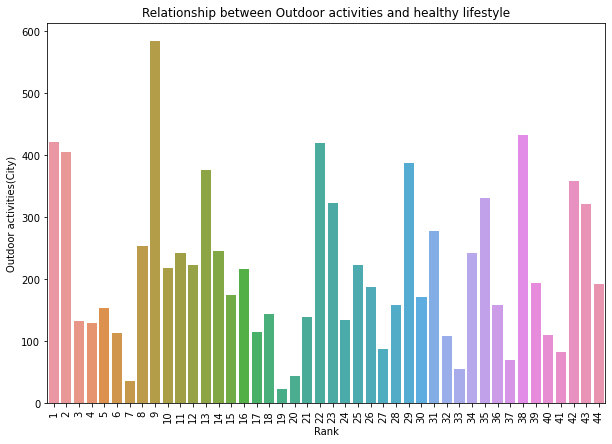

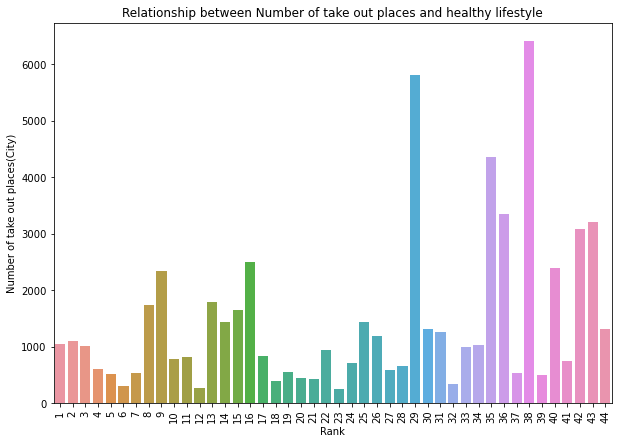

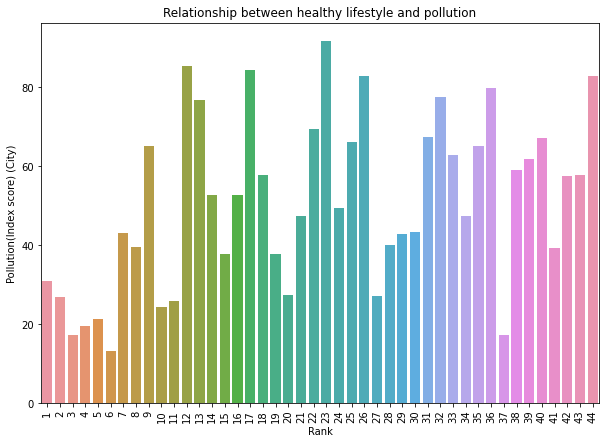

In [32]:
plt.figure(figsize = (10,7))
sns.barplot(data = data,x='Rank',y='Outdoor activities(City)')
plt.xticks(rotation=90)
plt.title("Relationship between Outdoor activities and healthy lifestyle")
plt.show()

plt.figure(figsize = (10,7))
sns.barplot(data = data,x='Rank',y='Number of take out places(City)')
plt.xticks(rotation=90)
plt.title("Relationship between Number of take out places and healthy lifestyle")
plt.show()

plt.figure(figsize = (10,7))
sns.barplot(data = data,x='Rank',y='Pollution(Index score) (City)')
plt.xticks(rotation=90)
plt.title("Relationship between healthy lifestyle and pollution")
plt.show()

It is obvious from figures that the less polluted cities are those having the most healthy lifestyle. They also have high level of outdoor activities like Amsterdam and Sydney.

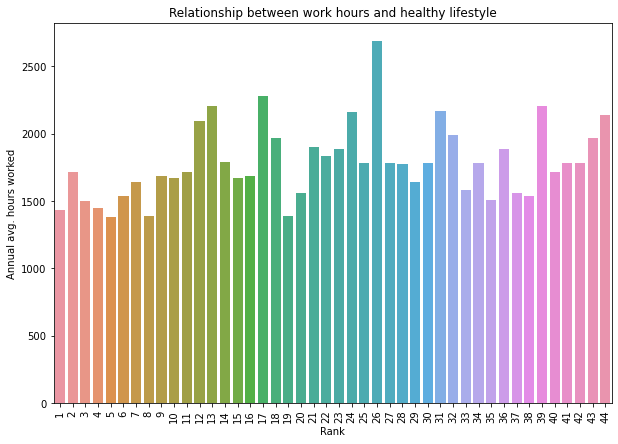

In [33]:
plt.figure(figsize = (10,7))
sns.barplot(data = data,x='Rank',y='Annual avg. hours worked' )
plt.xticks(rotation=90)
plt.title("Relationship between work hours and healthy lifestyle")
plt.show()

Well, the figures showed many parameters related to healthy lifecityle in cities. However, they dosen't show direct relationships and correlations among the parameters and between the features and the target (Rank). A correlaion matrix could help us to have more understanding on which parameteres have more effect on the target. 

In [34]:
cols = ["Rank","Sunshine hours(City)","Cost of a bottle of water(City)","Obesity levels(Country)","Life expectancy(years) (Country)","Pollution(Index score) (City)","Annual avg. hours worked","Happiness levels(Country)","Outdoor activities(City)","Number of take out places(City)","Cost of a monthly gym membership(City)"]
corr = data[cols].corr()
corr

,Rank,Sunshine hours(City),Cost of a bottle of water(City),Obesity levels(Country),Life expectancy(years) (Country),Pollution(Index score) (City),Annual avg. hours worked,Happiness levels(Country),Outdoor activities(City),Number of take out places(City),Cost of a monthly gym membership(City)
Rank,1.000000,0.011239,-0.141420,0.197486,-0.320034,0.429691,0.320241,-0.231970,-0.076972,0.363058,0.272521
Sunshine hours(City),0.011239,1.000000,-0.363834,0.283453,-0.365545,0.391219,0.429056,-0.346469,0.148989,-0.196834,-0.004884
Cost of a bottle of water(City),-0.141420,-0.363834,1.000000,0.293047,0.612382,-0.726705,-0.740869,0.813159,-0.260297,-0.089963,0.356461
Obesity levels(Country),0.197486,0.283453,0.293047,1.000000,0.091071,-0.231483,-0.340260,0.446399,0.150171,0.016833,-0.070904
Life expectancy(years) (Country),-0.320034,-0.365545,0.612382,0.091071,1.000000,-0.560100,-0.725159,0.724587,-0.044864,0.128163,0.417986
Pollution(Index score) (City),0.429691,0.391219,-0.726705,-0.231483,-0.560100,1.000000,0.677190,-0.756735,0.248743,0.191666,-0.250358
Annual avg. hours worked,0.320241,0.429056,-0.740869,-0.340260,-0.725159,0.677190,1.000000,-0.783361,0.021634,-0.144717,-0.130549
Happiness levels(Country),-0.231970,-0.346469,0.813159,0.446399,0.724587,-0.756735,-0.783361,1.000000,-0.137612,0.033116,0.297425
Outdoor activities(City),-0.076972,0.148989,-0.260297,0.150171,-0.044864,0.248743,0.021634,-0.137612,1.000000,0.528200,-0.115400
Number of take out places(City),0.363058,-0.196834,-0.089963,0.016833,0.128163,0.191666,-0.144717,0.033116,0.528200,1.000000,0.092610


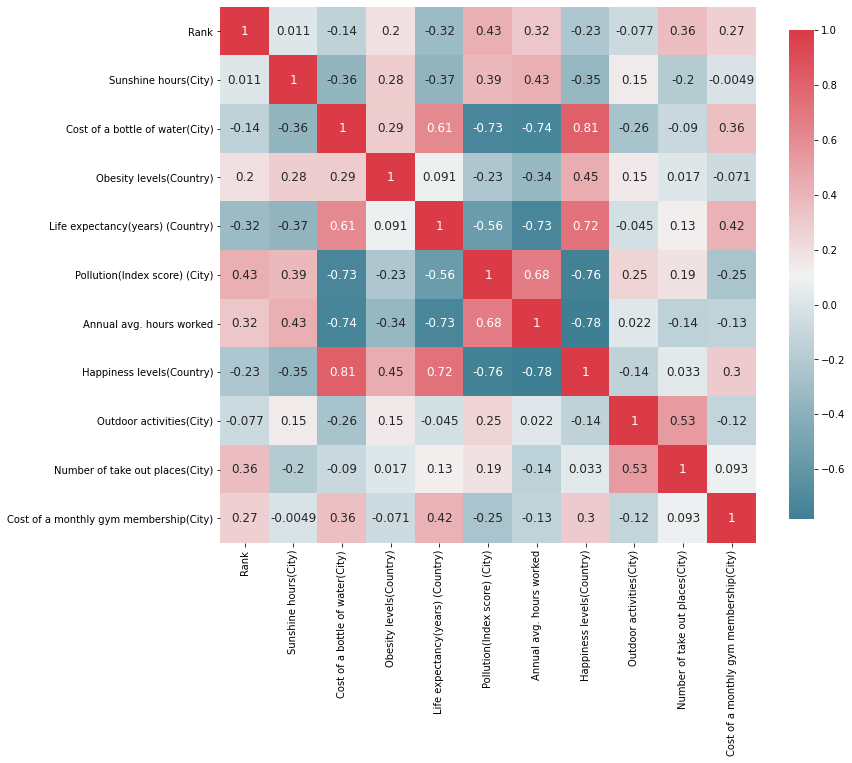

In [35]:
def plot_correlation_map( titanic): #the df.corr() method ignores non-numerical columns
    s , ax = plt.subplots( figsize =( 12 , 10 ) )

    cmap = sns.diverging_palette( 220 , 10 , as_cmap = True )

    s = sns.heatmap(corr, cmap = cmap,square=True, cbar_kws={ 'shrink' : .9 }, ax=ax, annot = True, annot_kws = { 'fontsize' : 12 }) 

plot_correlation_map(data)

plt.show()


NB: The rank is ascendant. The smaller the number is, the more healthy the city is.
Low to moderate correlations where noted between the target and the fetaures:
- low negative correlation was noted between rank and life expectancy (-0.35). It means cities with healthy lifestyle has relatively high life expectancy. 
- moderate positive correlation was reported between rank and pollution (0.43). The pollution is a creteria of a deteriorated lifestyle in a city. 
- low positive corraltion was noted between rank and work hours (0.32). Work hours are not asscoiated with healthy lifestyle.
- low negative correlation was observed between rank and happiness level (-0.23). Healthy lifestyle and happiness are relatively associated. 
- low positive corraltion was noted between rank and Number of takeout places (0.36).
Many high corrlations where observed between the features: 
- Happines level is highly correlated with food cost (bottle of water) 0.81.
- Life expectancy is highly correlated with happiness (0.72).
- Happiness level is negatively correlated with work hous (-0.78).


It seems like there are dependecies among features and between the target and the different parameters. Let's try to do a linear model for our data. But first we need to do some scaling for the data of different scales.

In [38]:
data.head(1)

,City,Rank,Sunshine hours(City),Cost of a bottle of water(City),Obesity levels(Country),Life expectancy(years) (Country),Pollution(Index score) (City),Annual avg. hours worked,Happiness levels(Country),Outdoor activities(City),Number of take out places(City),Cost of a monthly gym membership(City)
0,Amsterdam,1,1858.0,1.92,0.204,81.2,30.93,1434.0,7.44,422,1048,34.9


In [87]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn import metrics

x = data[['Sunshine hours(City)','Cost of a bottle of water(City)','Obesity levels(Country)','Life expectancy(years) (Country)','Pollution(Index score) (City)','Annual avg. hours worked','Happiness levels(Country)','Outdoor activities(City)','Number of take out places(City)','Number of take out places(City)']] 
y = data['Rank']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=1)


print("number of test samples :", x_test.shape[0])
print("number of training samples:",x_train.shape[0])

number of test samples : 9
number of training samples: 35


In [88]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [89]:
model = LinearRegression()
model.fit(x_train,y_train)
print(model.coef_)

[-4.13868086  6.0625797   8.28625456 -0.23265361  4.47846984  7.22656585
 -4.23725167 -7.08265029  4.10878587  4.10878587]


In [90]:
pd.DataFrame(model.coef_, x.columns, columns = ['Coeff'])

,Coeff
Sunshine hours(City),-4.138681
Cost of a bottle of water(City),6.062580
Obesity levels(Country),8.286255
Life expectancy(years) (Country),-0.232654
Pollution(Index score) (City),4.478470
Annual avg. hours worked,7.226566
Happiness levels(Country),-4.237252
Outdoor activities(City),-7.082650
Number of take out places(City),4.108786
Number of take out places(City),4.108786


In [91]:
print(model.intercept_)

22.114285714285714


In [92]:
predicted=model.predict(x_test)
print("MSE", metrics.mean_squared_error(y_test,predicted))
print("R squared", metrics.r2_score(y_test,predicted))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predicted)))

MSE 43.031649799944496
R squared 0.7418101012003331
RMSE: 6.559851355018991


In order to enhance our model, we will combine our linear model with gradient boost regressor based on decision tree. We choose a learning rate of 0.7 representing the contribution of each tree. The model will work with 200 decisions trees (estimators).

In [95]:
from sklearn import ensemble
clf = ensemble.GradientBoostingRegressor( loss='ls',
    learning_rate=0.7,
    n_estimators=200,
    alpha=0.7)
clf.fit(x_train, y_train)
y_pred=clf.predict(x_test)
print("MSE", metrics.mean_squared_error(y_test,y_pred))
print("R squared", metrics.r2_score(y_test,y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MSE 30.632595211507425
R squared 0.8162044287309554
RMSE: 5.534672096114405
